In [27]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from jcopml.pipeline import num_pipe, cat_pipe
import joblib
# nltk.download('wordnet')   # for Lemmatization

%matplotlib inline

In [28]:
total = pd.read_csv("testdatabersihhhh.csv", encoding="utf8")

In [29]:
total.head()

,waktu,filtering,tweets,polarity_score,polarity
0,2022-04-01 07:36:43,"['karanganyar', 'jumat', 'april', 'serda', 'ek...",karanganyar jumat april serda eko santoso angg...,-1,0
1,2022-04-01 07:36:32,"['ppkm', 'level', 'kota', 'pekanbaru', 'zona',...",ppkm level kota pekanbaru zona kuning tular covid,-9,0
2,2022-04-01 07:24:13,"['ppkm', 'longgar', '']",ppkm longgar,3,1
3,2022-04-01 07:21:48,"['ppkm', 'aspirasi']",ppkm aspirasi,0,1
4,2022-04-01 07:19:50,"['karanganyar', 'jumat', 'april', 'serda', 'di...",karanganyar jumat april serda didik anggota ko...,-1,0


In [30]:
tweet = total.columns.values[2]
sentiment = total.columns.values[1]
tweet, sentiment


('tweets', 'filtering')

In [31]:
#balancing dataset
data1 = total[total['polarity']==0].sample(796,replace=True)
data2 = total[total['polarity']==1].sample(796,replace=True)
df=pd.concat([data1, data2])

df.shape
df['polarity'].value_counts(normalize=True)

0    0.5
1    0.5
Name: polarity, dtype: float64

In [32]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   waktu           1594 non-null   object
 1   filtering       1594 non-null   object
 2   tweets          1594 non-null   object
 3   polarity_score  1594 non-null   int64 
 4   polarity        1594 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 62.4+ KB


In [33]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize = (4, 4))
# sizes = [count for count in df['polarity'].value_counts()]
# colors = ['g', 'r']
# labels = list(df['polarity'].value_counts().index)
# explode = (0, 0)
# ax.pie(x = sizes, labels = labels, colors = colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize':10})
# plt.savefig("gambar/pembagiandata.jpg")
# plt.show()

In [34]:
# fitur n-gram
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,3),max_features=10000)    # Ngram
final_vectorized_data = count_vectorizer.fit_transform(total['tweets'])
final_vectorized_data

n = pd.DataFrame(final_vectorized_data.toarray(), columns = count_vectorizer.get_feature_names())

In [35]:
vektor = n
vektor[1:5]

,aa,abdul,abdul halim,abdul halim iskandar,abi,absurd,absurd milik,acak,acara,acu,...,zona kuning tular,zona merah,zona merah mbak,zoom,zoom anak,zoom anak curah,zoom bagus,zoom bagus sxexxa,zoom kadang,zoom kadang pas
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# vektor.to_csv('vektor.csv')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total["polarity"],test_size=0.1, random_state=43)


In [38]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1434, 10000)
X_test_shape :  (160, 10000)
y_train_shape :  (1434,)
y_test_shape :  (160,)


In [39]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
model_naive = MultinomialNB()
model_naive.fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)
# print(predicted_naive)

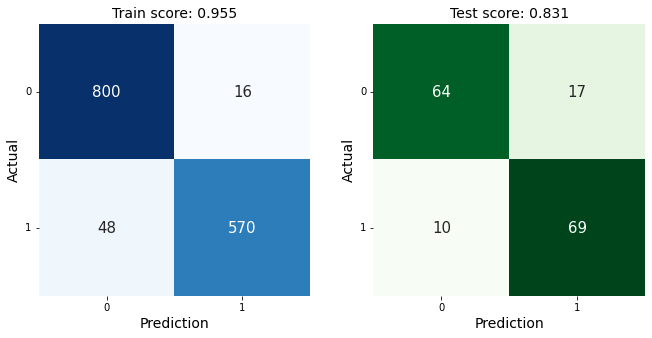

In [40]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_naive)
plt.savefig("gambar/test_score.png")

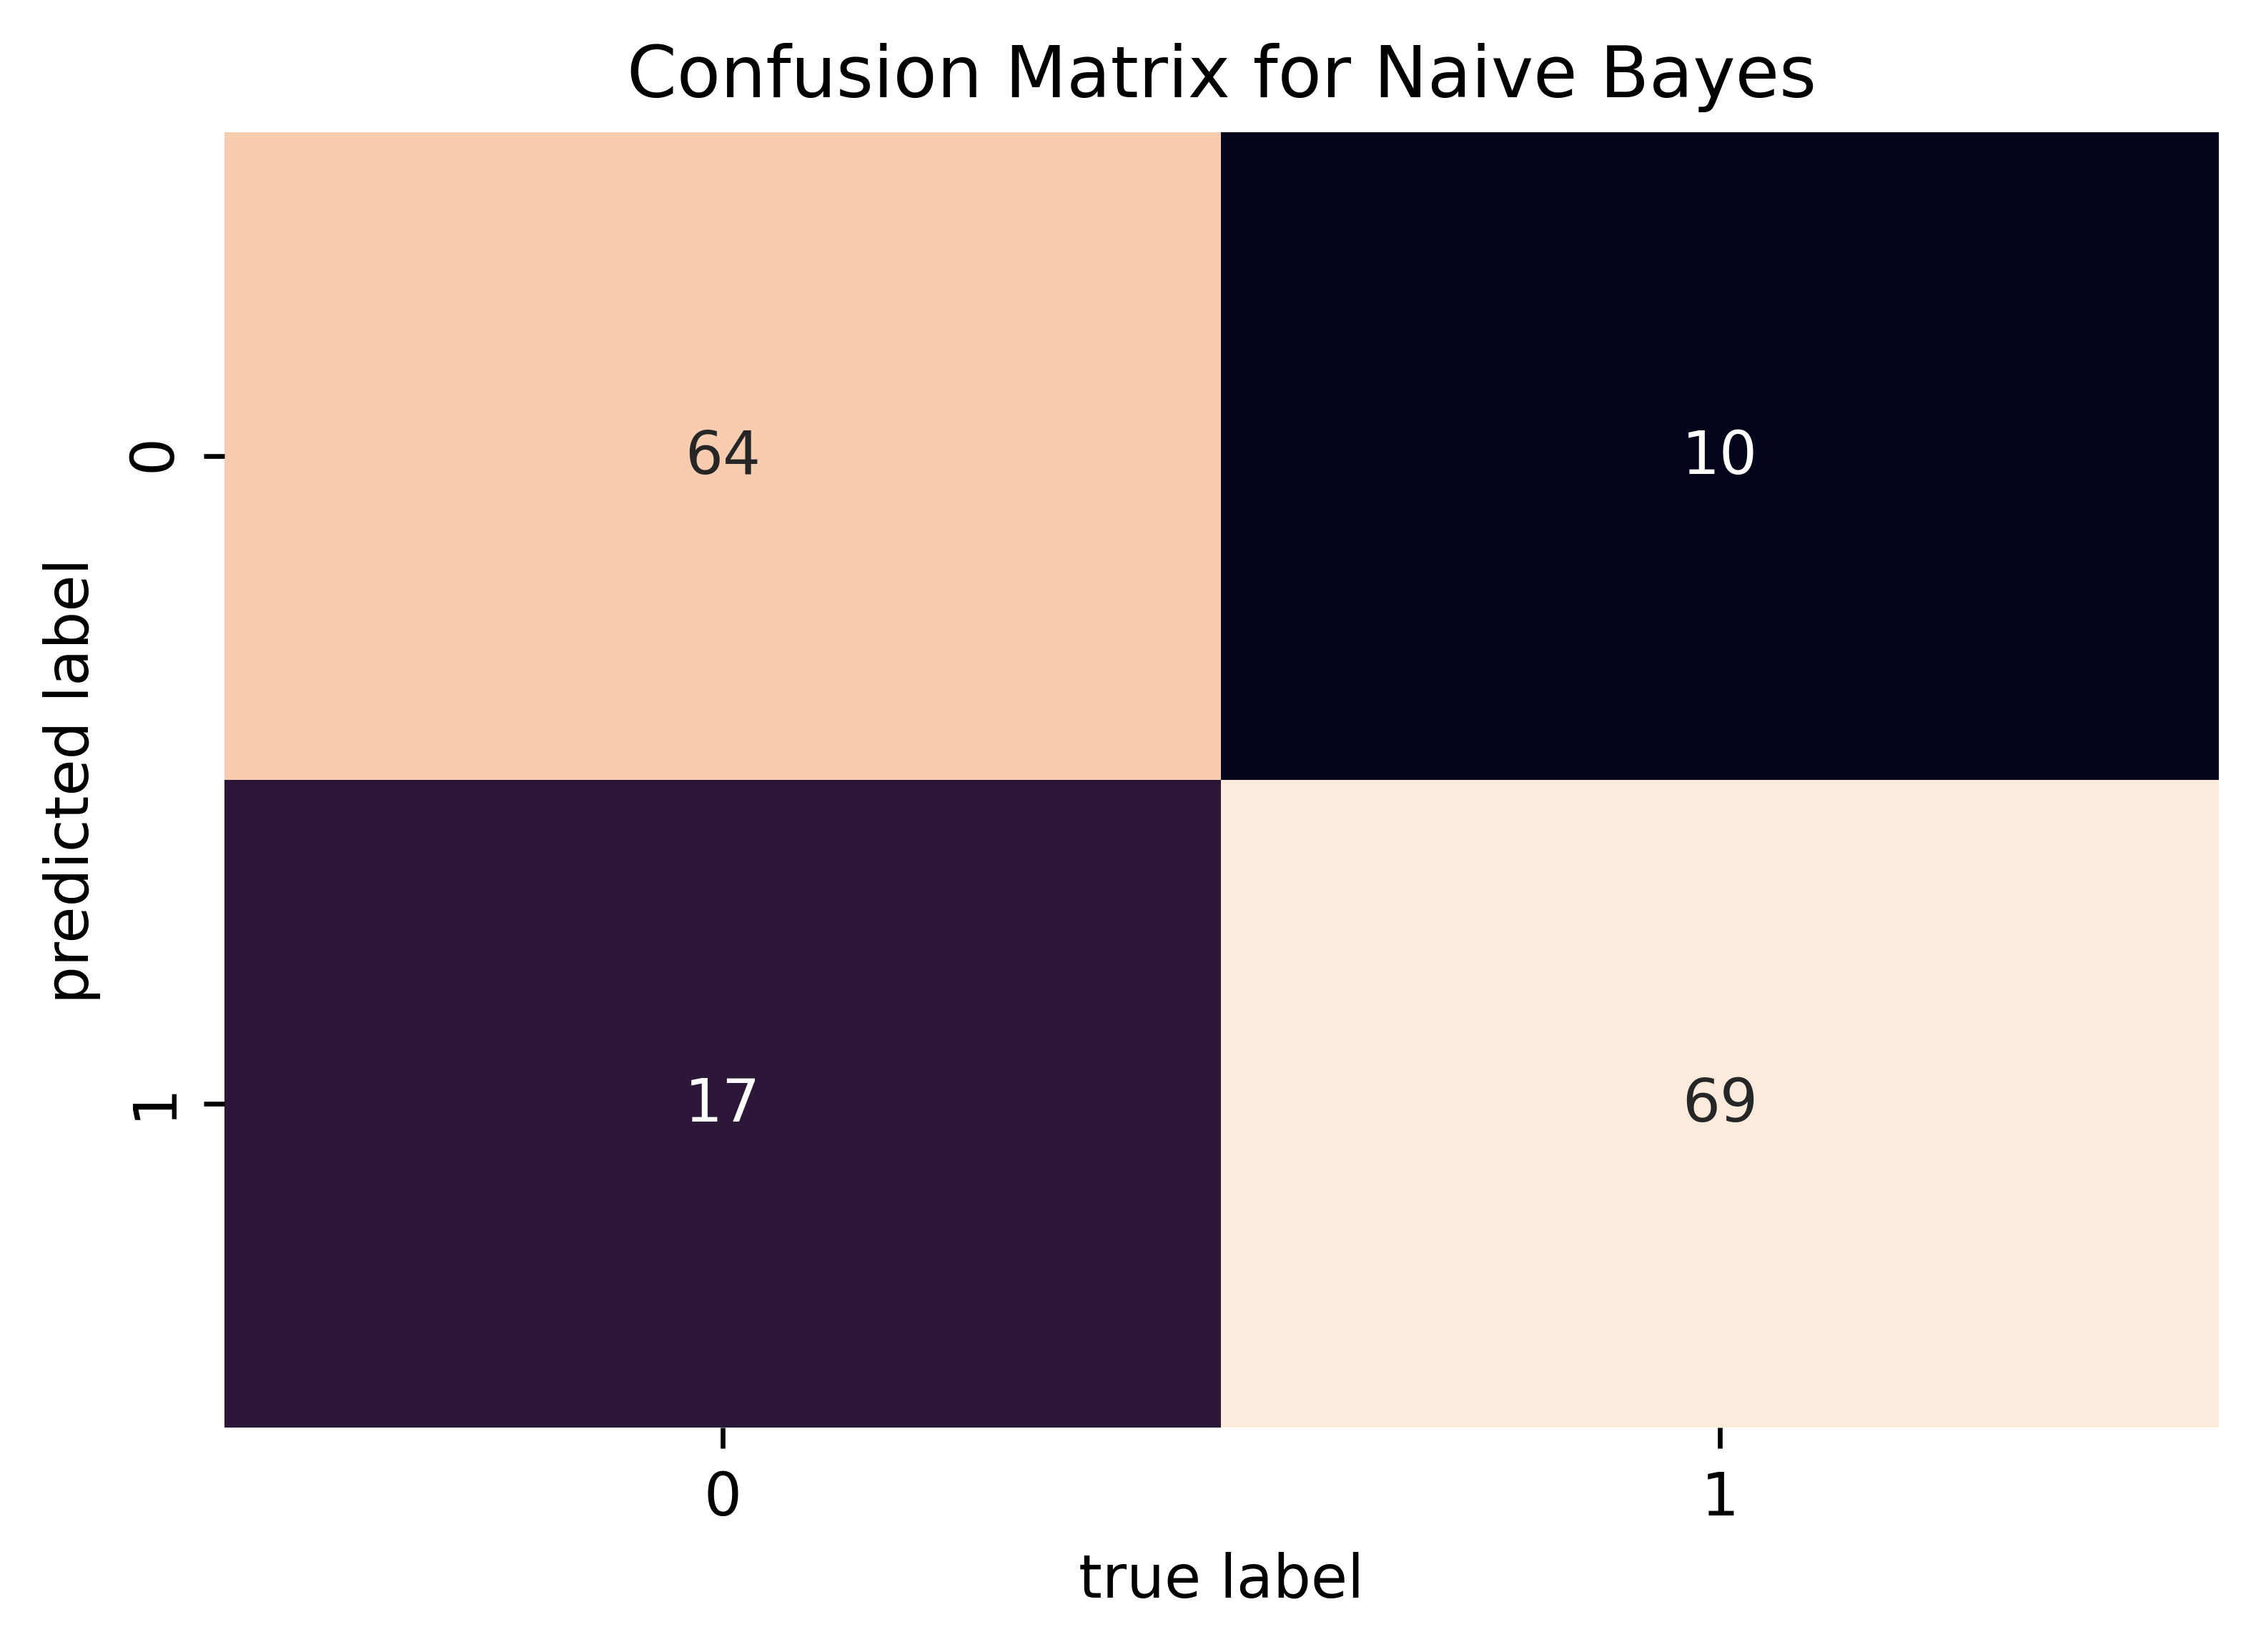

In [41]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("gambar/confusion_matrix.png")
plt.show()

In [42]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes testing: ",score_naive)

Accuracy with Naive-bayes testing:  0.83125


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        81
           1       0.80      0.87      0.84        79

    accuracy                           0.83       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.83      0.83       160



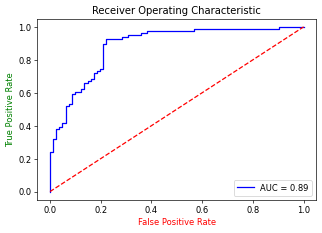

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=60)                       # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.savefig("ROC_curve.png")
plt.show()

In [20]:
#ANALISIS menggunakan MODEL yang dibuat, menggunakan data baru
mentah = pd.read_csv("duabersih.csv", encoding="utf8")
mentah

,waktu,stemming,tweets
0,2022-12-22 06:13:47,"['yang', 'jalan', 'dalam', 'bijak', 'laku', 'b...",yang jalan dalam bijak laku batas giat masyara...
1,2022-12-22 04:11:00,"['presiden', 'isyarat', 'mungkin', 'laku', 'ba...",presiden isyarat mungkin laku batas giat masya...
2,2022-12-22 03:21:09,"['presiden', 'joko', 'widodo', 'jokowi', 'bebe...",presiden joko widodo jokowi beber bahwan kasus...
3,2022-12-21 23:25:11,"['presiden', 'joko', 'widodo', 'jokowi', 'renc...",presiden joko widodo jokowi rencana henti bija...
4,2022-12-21 15:29:15,"['presiden', 'joko', 'widodo', 'jokowi', 'beri...",presiden joko widodo jokowi beri sinyal akan h...
...,...,...,...
639,2022-12-21 08:32:57,"['good', 'news', 'akhir', 'tahun', 'ppkm', 'ak...",good news akhir tahun ppkm akhir akan henti ba...
640,2022-12-21 08:32:46,"['status', 'pandemi', 'jokowi', 'menteri', 'se...",status pandemi jokowi menteri selesai kaji hen...
641,2022-12-21 08:32:06,"['belakang', 'ini', 'kasus', 'hari', 'ada', 'd...",belakang ini kasus hari ada di angka dan mungk...
642,2022-12-21 08:31:39,"['jadi', 'tahun', 'baru', 'tgl', 'untuk', 'ray...",jadi tahun baru tgl untuk raya menang ganti sa...


In [21]:
#analisis data
def TestModel(data):
    X_vect = CountVectorizer(ngram_range=(1,3),max_features=6000)
    final_vectorized_data = X_vect.fit_transform(mentah['tweets']) 
    std_predictions = model_naive.predict(final_vectorized_data)
    df = pd.DataFrame(data = {'waktu': mentah['waktu'],'tweets': mentah['tweets'], 'Sentiment': std_predictions })
    return df
TestModel(mentah['tweets'])

,waktu,tweets,Sentiment
0,2022-12-22 06:13:47,yang jalan dalam bijak laku batas giat masyara...,0
1,2022-12-22 04:11:00,presiden isyarat mungkin laku batas giat masya...,0
2,2022-12-22 03:21:09,presiden joko widodo jokowi beber bahwan kasus...,0
3,2022-12-21 23:25:11,presiden joko widodo jokowi rencana henti bija...,1
4,2022-12-21 15:29:15,presiden joko widodo jokowi beri sinyal akan h...,1
...,...,...,...
639,2022-12-21 08:32:57,good news akhir tahun ppkm akhir akan henti ba...,1
640,2022-12-21 08:32:46,status pandemi jokowi menteri selesai kaji hen...,1
641,2022-12-21 08:32:06,belakang ini kasus hari ada di angka dan mungk...,1
642,2022-12-21 08:31:39,jadi tahun baru tgl untuk raya menang ganti sa...,1


In [22]:
TestModel(mentah).to_csv('duabersih.csv',encoding='utf8', index=False)

In [23]:
Anal = pd.read_csv("duabersih.csv", encoding="utf8")

In [24]:
Anal['Sentiment'].value_counts()

1    457
0    187
Name: Sentiment, dtype: int64

In [25]:
def polarity_encode(x):
    if(x == 1):
        return 'Positif'
    if(x == 0):
        return 'Negatif'
Anal.Sentiment = Anal.Sentiment.apply(polarity_encode)

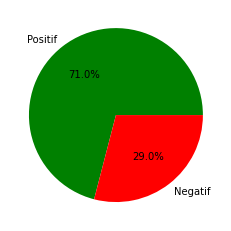

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))
sizes = [count for count in Anal['Sentiment'].value_counts()]
labels = list(Anal['Sentiment'].value_counts().index)
colors = ['g', 'r']
explode = (0, 0)
ax.pie(x = sizes, labels = labels, colors = colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize':10})
plt.savefig("gambar/Analisis.jpg")
plt.show()